In [1]:
import pandas as pd
import os

Electronics Store Sales Analysis

In [2]:
df = pd.read_csv("D:\CV\Projects present in CV\Python for finding sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/Sales_April_2019.csv")

#add all the data to 1 data frame
#here we are creating the method then we will concatinate the data into one file 

files = [file for file in os.listdir("D:\CV\Projects present in CV\Python for finding sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("D:\CV\Projects present in CV\Python for finding sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
#all months data is converted into a csv file here we have kept index false so that there are no serial numbers present
all_months_data.to_csv("all_data.csv", index=False)


In [3]:
#all of the data has been read again and that too in just one file
all_data=pd.read_csv("all_data.csv")

##To clean the data hich is always the first step but nobody likes it

In [4]:
Nan_df=all_data[all_data.isna().any(axis=1)]
Nan_df



all_data = all_data.dropna()
#this was done to drop the values which contained NA as data 

#as per the new data there is somewhere or present in the data so now we need to find where that is 

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


After The Data IS Cleaned

QUESTION 1 - What was the best month where the sales were excellent, how much was the money earned.

In [7]:

k=all_data.iloc[:,[4]]

#Sol first we need to add a separate months column so that our analysis becomes real easy

In [8]:
all_data["Month"]=all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
#to convert the new added months column from string to int
all_data["Month"] = all_data["Month"].astype('int32')


#to convert all the other data that is supposed to be a int to int
all_data["Quantity Ordered"]= all_data["Quantity Ordered"].astype('int32')


#this is another way of converting to float/int as pandas will automatically determine that which should it be added to
all_data["Price Each"]= pd.to_numeric(all_data["Price Each"])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Now to add sales data in a column by multiplying quantity ordered to Price of each comodity

In [10]:
#this is an easy way to multiply data within one data frame
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
#in this we converted the data grouped in months. Now we have summed up the data  
results = all_data.groupby("Month").sum()

#Visualization of data

In [13]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

<Figure size 640x480 with 1 Axes>

QUESTION 2 - Which city has highest number of sales

In [14]:
#we need to add a different city column   we will use .apply method as it allows us to apply any type of function on dataframe
def get_city(address):
    return address.split(",")[1]
    
def get_state(address):
    return address.split(",")[2].split(" ")[1]


#we can apply any function by this .apply method   lambda x allows us to grab that fuunction's result

all_data["City"]= all_data["Purchase Address"].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [15]:
results_city = all_data.groupby("City").sum()

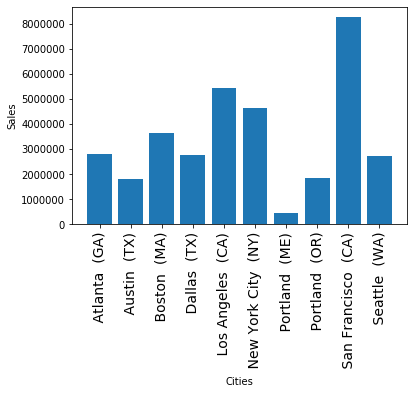

In [16]:
#to take out the names of different cities from data
cities= [city for city, df in all_data.groupby('City')]
#to order the cities names and results of each city we need to reorder


plt.bar(cities,results_city["Sales"])
plt.xticks(cities, rotation='vertical', size=14)
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.show()

QUESTION 3- at what should we display the advertising so as to maximize the likelyhood of customer's buying product?

In [17]:
#we will be using the datetime library of python
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [18]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minutes"] = all_data["Order Date"].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


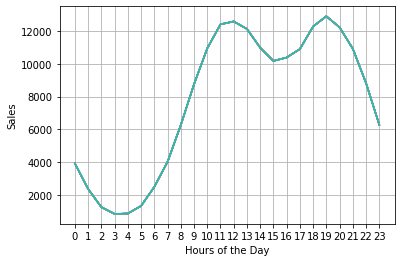

In [19]:
#grabbing the keys same as before
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xlabel("Hours of the Day")
plt.ylabel("Sales")
plt.xticks(hours)
plt.grid()
plt.show()

Solutions this charts shows before 11 am and 7pm would be the best time to do so

QUESTION - What Products are sold together???

#Approach 1   
#the products which were sold at the same time of a particular day and were sold to the same address are the ones which we are talking about

In [20]:
all_data['Time of Order'] = pd.to_datetime(all_data['Order Date']).dt.time
all_data['Date of Order'] = pd.to_datetime(all_data['Order Date']).dt.date
all_data.head()
#now we have the 3 required columns the date the time and the address we need to create a new data frame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Time of Order,Date of Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,08:46:00,2019-04-19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,22:30:00,2019-04-07
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,14:38:00,2019-04-12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,14:38:00,2019-04-12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,09:27:00,2019-04-30


In [21]:
k = all_data.groupby("Purchase Address").count()
k.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Minutes,Time of Order,Date of Order
Purchase Address,,,,,,,,,,,,
"1 11th St, Atlanta, GA 30301",1,1,1,1,1,1,1,1,1,1,1,1
"1 11th St, Los Angeles, CA 90001",1,1,1,1,1,1,1,1,1,1,1,1
"1 11th St, San Francisco, CA 94016",1,1,1,1,1,1,1,1,1,1,1,1
"1 12th St, Los Angeles, CA 90001",1,1,1,1,1,1,1,1,1,1,1,1
"1 12th St, New York City, NY 10001",1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
#actual solution of the question at  end of keep false i can put shift+tab to see what it did
#we passed false as we want to keep all the ammount of duplicants rather than keeping just some of it
df=all_data[all_data["Order ID"].duplicated(keep=False)]


#now we are grouping all the products based on their order id
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


#now we need to drop the duplicates so we take only 2 colums and drop
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [23]:
#now to anayze this we need to import new tools   

from itertools import combinations
from collections import Counter


count=Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    

#in row we splitted the elements of each row and we need to count them in pairs so thats why we have written 2 there. If we wroe 3 there then it would have been most common 3 occurances

count
# this is quite messy so 
count.most_common(20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [24]:
#we can do smart deals and sell these things together

QUESTION - WHICH PRODUCT WAS SOLD THE MOST AND WHY??

In [25]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Time of Order,Date of Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,08:46:00,2019-04-19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,22:30:00,2019-04-07
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,14:38:00,2019-04-12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,14:38:00,2019-04-12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,09:27:00,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56,20:56:00,2019-09-17
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0,16:00:00,2019-09-01
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39,07:39:00,2019-09-23
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30,17:30:00,2019-09-19


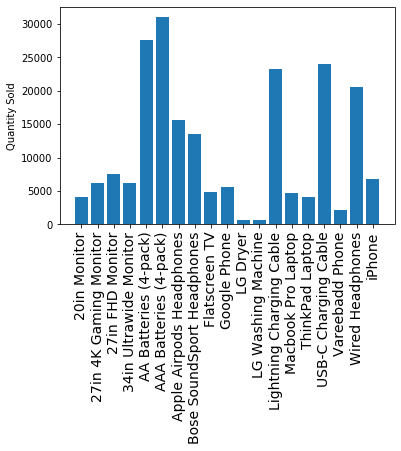

In [26]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size=14)
plt.ylabel("Quantity Sold")
plt.show()

#we observe that the 3A battery was sold the most One reason can be comparision to price

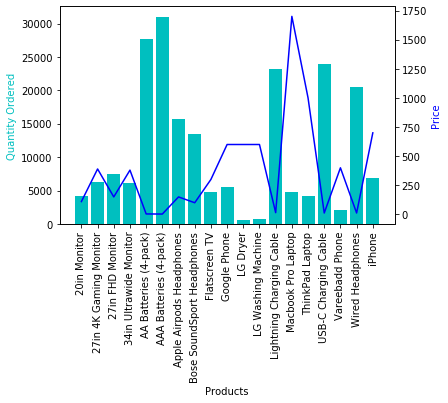

In [46]:
prices = all_data.groupby('Product').mean()['Price Each']
#we will add this in secondary y axis

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='c')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color= 'c')
ax2.set_ylabel("Price", color= 'b')

ax1.set_xticklabels(products,rotation = 'vertical', size=10)

plt.show()

thus we observe here that products whose prices are sold in less quantity. But Laptops are an exception since the demand for them is very high as there are many students. 